Priority Queue

In [ ]:
import heapq ## priority queue

pq=[] # stores (value, key) pair
heapq.heappush(pq, (6, 's'))
print(pq)
heapq.heappush(pq, (4, 'a'))
print(pq)
heapq.heappush(pq, (5, 'c'))
print(pq)
d, u = heapq.heappop(pq) # brings out the pair with smallest value EXTRACT_MIN
print(pq)


[(6, 's')]
[(4, 'a'), (6, 's')]
[(4, 'a'), (6, 's'), (5, 'c')]
[(5, 'c'), (6, 's')]


In [ ]:
# Not required!
import heapq

def dijkstra_clrs(G, s):

    d = {v: float("inf") for v in G.nodes()} # dictionary that stores the distance of a node from s



    pi = {v: None for v in G.nodes()} # parent


    d[s] = 0

    # priority queue Q
    Q = [(0, s)]

    while Q:
        val , u = heapq.heappop(Q)   # EXTRACT-MIN

        for v in G.neighbors(u):
            w = G[u][v].get("weight", 1)
            # RELAX(u, v)
            if d[v] > d[u] + w:
                d[v] = d[u] + w
                pi[v] = u
                heapq.heappush(Q, (d[v], v))

    return d, pi


# A* Algorithm



In [ ]:
G = nx.Graph()
G.add_weighted_edges_from([
    (0, 1, 4),
    (0, 2, 1),
    (2, 1, 2),
    (1, 3, 1),
    (2, 3, 5)
])

In [ ]:
import heapq

def astar(G, start, goal, h):
    g = {v: float("inf") for v in G.nodes()}
    f = {v: float("inf") for v in G.nodes()}
    parent = {}

    g[start] = 0
    f[start] = h(start)

    pq = [(f[start], start)]

    while pq:
        x, u = heapq.heappop(pq)

        if u == goal:
            return g, parent

        for v in G.neighbors(u):
            w = G[u][v].get("weight") #  You may use w = G[u][v].get("weight", 1) if the graph is unweighted.
            if g[u] + w < g[v]:
                g[v] = g[u] + w
                f[v] = g[v] + h(v)
                parent[v] = u
                heapq.heappush(pq, (f[v], v))

    return None

def h(n):
  return 0

astar(G, 0, 3, h)

({0: 0, 1: 3, 2: 1, 3: 4}, {1: 2, 2: 0, 3: 1})

**Exercise**: Generate a 5x5 grid graph with each edge having weight 1. Now, use the Euclidean distance to measure h. More specifically, if the $goal = (x,y)$ and $n=(a,b)$ then define $h(n)=\sqrt{(x-a)^2+(y-b)^2}$. With this run A* algorithm on the condtructed graph. Try various $start, goal$ pairs.

# MinMax Algorithm

**MinMax Setup:** The next code generates a tree of certain depth $d$ and assigns utility value (a random number) to each leaf.  

In [ ]:
import networkx as nx
import random

def generate_tree(depth, branching):
    G = nx.DiGraph()
    node_id = 0

    def build(d):
        nonlocal node_id # the nonlocal keyword telles that node_id is defined outside.
        u = node_id
        node_id += 1
        G.add_node(u)

        if d == 0:
            G.nodes[u]["value"] = random.randint(-10, 10)

            for _ in range(branching):
                v = build(d-1)
                G.add_edge(u, v)else:

        return u

    root = build(depth)
    return G, root


 **Exercise**: The following code does not produce a good representation of the tree. Can you try to print the tree ina a better way, with the vertex lablels?

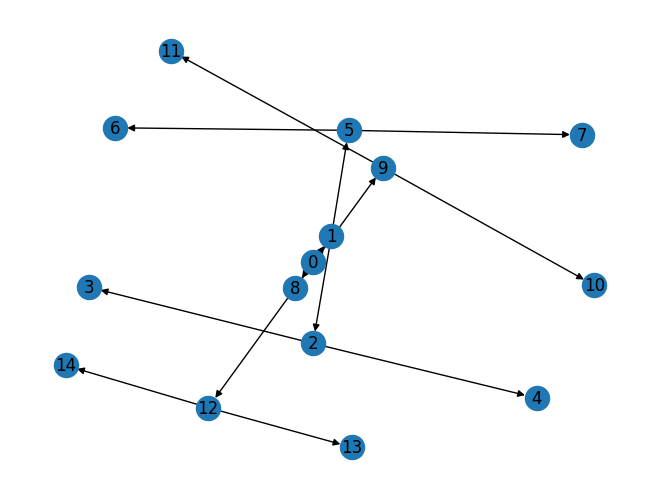

In [ ]:
import matplotlib.pyplot as plt
G, root = generate_tree(depth=3, branching=2)
nx.draw(G, with_labels=True)
plt.show()

The algorithm

In [ ]:
def minimax(G, u, isMaximizing):
    children = list(G.successors(u))

    # leaf node
    if not children:
        return G.nodes[u]["value"]

    if isMaximizing:
        return max(minimax(G, v, False) for v in children)
    else:
        return min(minimax(G, v, True) for v in children)


In [ ]:
G, root = generate_tree(depth=3, branching=2)

value = minimax(G, root, True)
print("Minimax value at root:", value)


Minimax value at root: 4


 **Challenge Problem**: Model the game of Tic-tac-toe as a min-max game. Write a program for it.

# $\alpha$-$\beta$-pruning

In [ ]:
# Prepare a small tree
import networkx as nx

G = nx.DiGraph()

# Tree structure
edges = [
    (0, 1), (0, 2),      # 0 is MAX
    (1, 3), (1, 4),      # 1 is MIN
    (2, 5), (2, 6)       # leaves
]
G.add_edges_from(edges)

# Leaf utilities
values = {
    3: 3,
    4: 5,
    5: 2,
    6: 9
}

for v, val in values.items():
    G.nodes[v]["value"] = val

root = 0


Algorithm

In [ ]:
def alphabeta(G, u, depth, alpha, beta, maximizing):
    children = list(G.successors(u))

    # terminal node
    if not children or depth == 0: # if children=[]
        return G.nodes[u].get("value")

    if maximizing:
        value = float("-inf")
        for v in children:
            value = max(value, alphabeta(G, v, depth-1, alpha, beta, False))
            alpha = max(alpha, value)
            if alpha >= beta:     # PRUNE
                break
        return value

    else:
        value = float("inf")
        for v in children:
            value = min(value, alphabeta(G, v, depth-1, alpha, beta, True))
            beta = min(beta, value)
            if beta <= alpha:     # PRUNE
                break
        return value


**Challenge Problem**: Design a Tic-Tac-Toe solver using alpha-beta pruning algorithm.